In [434]:
# List the entire stock market that we can trade as the universe
universe = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN", "FB", "NFLX", "TSLA", "ORCL", "SAP")

# Create an empty data frame for the combined data
combined_data = data.frame()

# Read data for each stock and add to combined data frame
for (symbol in universe){
    stock_data = read.csv(paste0(symbol, "_data.csv"))
    if (nrow(combined_data) == 0){
        combined_data = stock_data
    } else {
        combined_data = merge(combined_data, stock_data, by.x = "Date", by.y = "Date", all = TRUE)
    }
}

# Keep only the Close and Adj.Close columns
combined_data = combined_data[, grepl("^(Date|Close\\.|Adj.Close\\.)", colnames(combined_data))]

# Change date in the dataframe from character to date
combined_data$Date = as.Date(combined_data$Date, format = "%Y-%m-%d")

# Rename columns to include stock names as needed
colnames(combined_data) = c("Date", "Close.IBM", "Adj.Close.IBM", "Close.MSFT", "Adj.Close.MSFT", "Close.GOOG", "Adj.Close.GOOG", "Close.AAPL", "Adj.Close.AAPL", 
                           "Close.AMZN", "Adj.Close.AMZN", "Close.FB", "Adj.Close.FB", "Close.NFLX", "Adj.Close.NFLX", "Close.TSLA", "Adj.Close.TSLA",
                            "Close.ORCL", "Adj.Close.ORCL", "Close.SAP", "Adj.Close.SAP")

str(combined_data)

Warning message in merge.data.frame(combined_data, stock_data, by.x = "Date", by.y = "Date", :
“column names ‘Open.x’, ‘High.x’, ‘Low.x’, ‘Close.x’, ‘Adj.Close.x’, ‘Volume.x’, ‘Open.y’, ‘High.y’, ‘Low.y’, ‘Close.y’, ‘Adj.Close.y’, ‘Volume.y’ are duplicated in the result”
Warning message in merge.data.frame(combined_data, stock_data, by.x = "Date", by.y = "Date", :
“column names ‘Open.x’, ‘High.x’, ‘Low.x’, ‘Close.x’, ‘Adj.Close.x’, ‘Volume.x’, ‘Open.y’, ‘High.y’, ‘Low.y’, ‘Close.y’, ‘Adj.Close.y’, ‘Volume.y’ are duplicated in the result”
Warning message in merge.data.frame(combined_data, stock_data, by.x = "Date", by.y = "Date", :
“column names ‘Open.x’, ‘High.x’, ‘Low.x’, ‘Close.x’, ‘Adj.Close.x’, ‘Volume.x’, ‘Open.y’, ‘High.y’, ‘Low.y’, ‘Close.y’, ‘Adj.Close.y’, ‘Volume.y’, ‘Open.x’, ‘High.x’, ‘Low.x’, ‘Close.x’, ‘Adj.Close.x’, ‘Volume.x’, ‘Open.y’, ‘High.y’, ‘Low.y’, ‘Close.y’, ‘Adj.Close.y’, ‘Volume.y’ are duplicated in the result”
Warning message in merge.data.frame(combined_data,

'data.frame':	250 obs. of  21 variables:
 $ Date          : Date, format: "2018-01-02" "2018-01-03" ...
 $ Close.IBM     : num  147 152 155 155 156 ...
 $ Adj.Close.IBM : num  112 115 117 118 118 ...
 $ Close.MSFT    : num  85.9 86.3 87.1 88.2 88.3 ...
 $ Adj.Close.MSFT: num  80.4 80.8 81.5 82.5 82.6 ...
 $ Close.GOOG    : num  53.2 54.1 54.3 55.1 55.3 ...
 $ Adj.Close.GOOG: num  53.2 54.1 54.3 55.1 55.3 ...
 $ Close.AAPL    : num  43.1 43.1 43.3 43.8 43.6 ...
 $ Adj.Close.AAPL: num  40.8 40.8 41 41.4 41.3 ...
 $ Close.AMZN    : num  59.5 60.2 60.5 61.5 62.3 ...
 $ Adj.Close.AMZN: num  59.5 60.2 60.5 61.5 62.3 ...
 $ Close.FB      : num  181 185 184 187 188 ...
 $ Adj.Close.FB  : num  181 185 184 187 188 ...
 $ Close.NFLX    : num  201 205 206 210 212 ...
 $ Adj.Close.NFLX: num  201 205 206 210 212 ...
 $ Close.TSLA    : num  21.4 21.1 21 21.1 22.4 ...
 $ Adj.Close.TSLA: num  21.4 21.1 21 21.1 22.4 ...
 $ Close.ORCL    : num  46.6 47.7 48.2 48.5 49 ...
 $ Adj.Close.ORCL: num  42.3 43.3

In [435]:
# Part 1
# Create portfolio of $5 million invested
initial_portfolio_funds = 5000000

# Create the 5 stocks you choose to invest in
initial_stock_buy = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN")

# Split the portfolio funds equally among the stocks
stock_investment_amount = initial_portfolio_funds / length(initial_stock_buy)

# Create vectors to store shares to buy
shares_to_buy = numeric(length(initial_stock_buy))
total_spent = numeric(length(initial_stock_buy))

# Calculate the number of shares to be purchased per stock based on the funds allocated per stock
for (i in 1:length(initial_stock_buy)){
    stock_symbol = initial_stock_buy[i]
    close_price = combined_data[, paste("Close", stock_symbol, sep = ".")]
    shares_to_buy[i] = floor(stock_investment_amount / close_price[1])
    total_spent[i] = shares_to_buy[i] * close_price[1]
    
    print(paste("Stock Symbol: ", stock_symbol))
    print(paste("Close Price: ", close_price[1]))
    print(paste("Shares to Buy: ", shares_to_buy[i]))
    print(total_spent[i])
}

# Calculate the funds remaining after purchasing stocks
cash_balance_portfolio = initial_portfolio_funds - sum(total_spent)

print(paste("Cash Balance in Portfolio: ", cash_balance_portfolio))

[1] "Stock Symbol:  IBM"
[1] "Close Price:  147.466537"
[1] "Shares to Buy:  6781"
[1] 999970.6
[1] "Stock Symbol:  MSFT"
[1] "Close Price:  85.949997"
[1] "Shares to Buy:  11634"
[1] 999942.3
[1] "Stock Symbol:  GOOG"
[1] "Close Price:  53.25"
[1] "Shares to Buy:  18779"
[1] 999981.8
[1] "Stock Symbol:  AAPL"
[1] "Close Price:  43.064999"
[1] "Shares to Buy:  23220"
[1] 999969.3
[1] "Stock Symbol:  AMZN"
[1] "Close Price:  59.4505"
[1] "Shares to Buy:  16820"
[1] 999957.4
[1] "Cash Balance in Portfolio:  178.710725000128"


In [436]:
print(paste("Initial portfolio holdings:", initial_stock_buy))
print(paste("Cash balance in portfolio:", cash_balance_portfolio))

[1] "Initial portfolio holdings: IBM"  "Initial portfolio holdings: MSFT"
[3] "Initial portfolio holdings: GOOG" "Initial portfolio holdings: AAPL"
[5] "Initial portfolio holdings: AMZN"
[1] "Cash balance in portfolio: 178.710725000128"


In [437]:
# Create a df with only the Close prices of stock in the portfolio (for simplicity)
close_data = combined_data[, c("Close.IBM","Close.MSFT", "Close.GOOG", "Close.AAPL", "Close.AMZN")]

# Create a 1 column df of what the value will be for each stock each day and then combine all into one df
IBM_balance = shares_to_buy[1] * combined_data[2]
MSFT_balance = shares_to_buy[2] * combined_data[4]
GOOG_balance = shares_to_buy[3] * combined_data[6]
AAPL_balance = shares_to_buy[4] * combined_data[8]
AMZN_balance = shares_to_buy[5] * combined_data[10]

# Create portfolio
live_portfolio = cbind(Date = combined_data$Date,
                       IBM_value = IBM_balance,
                       MSFT_value = MSFT_balance,
                       GOOG_value = GOOG_balance,
                       AAPL_value = AAPL_balance,
                       AMZN_value = AMZN_balance,
                       Cash = cash_balance_portfolio)

# Add a portfolio value column
live_portfolio$Portfolio_Value = rowSums(live_portfolio[, c(2:7)])

head(live_portfolio)

MTM = live_portfolio$Portfolio_Value

,Date,Close.IBM,Close.MSFT,Close.GOOG,Close.AAPL,Close.AMZN,Cash,Portfolio_Value
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,999970.6,999942.3,999981.8,999969.3,999957.4,178.7107,5000000
2,2018-01-03,1027457.7,1004595.9,1016394.6,999795.1,1012732.2,178.7107,5061154
3,2018-01-04,1048267.4,1013437.8,1020075.3,1004439.2,1017265.2,178.7107,5103664
4,2018-01-05,1053388.8,1026002.5,1034938.9,1015875.0,1033706.8,178.7107,5164091
5,2018-01-08,1059741.9,1027049.5,1039361.3,1012101.8,1048617.6,178.7107,5187051
6,2018-01-09,1062075.8,1026351.5,1038722.8,1011985.7,1053520.7,178.7107,5192835


In [438]:
# Part 2
# Select the specified rows
rebalance = combined_data[seq(1, nrow(combined_data), by = 5), seq(1, ncol(combined_data), by = 2)]

# Create percent changes
percent_changes = numeric()

# Find the percent change in the adj.close of all stocks in the universe
for (i in 2:11){
    new_value = rebalance[2,i]
    old_value = rebalance[1,i]
    
    percent_change = (new_value - old_value) / old_value * 100
    percent_changes = c(percent_changes, percent_change)
}

print(percent_changes)

# Order the stocks lowest change to highest (top 5 will be bought)
print(universe[order(percent_changes)[1:5]])
print(universe[order(percent_changes, decreasing = TRUE)[1:5]])


rebalance_buy_low = universe[order(percent_changes)[1:5]]

# New funds amount
rebalancing_funds = MTM[6]

# Create new stock buying list
new_stock_buy_low = c(rebalance_buy_low)

# Create amount to invest into each stock
new_stock_investment_amount = rebalancing_funds / length(new_stock_buy_low)

# Create vectors to store shares to buy
new_shares_to_buy_low = numeric(length(new_stock_buy_low))
new_total_spent_low = numeric(length(new_stock_buy_low))

# Calculate the number of shares to be purchased per stock based on the funds allocated per stock
for (i in 1:length(new_stock_buy_low)){
    stock_symbol = new_stock_buy_low[i]
    new_close_price_low = combined_data[6, paste("Close", stock_symbol, sep = ".")]
    new_shares_to_buy_low[i] = floor(new_stock_investment_amount / new_close_price_low[1])
    new_total_spent_low[i] = new_shares_to_buy_low[i] * new_close_price_low[1]
    
    print(paste("Stock Symbol: ", stock_symbol))
    print(paste("Close Price: ", new_close_price_low[1]))
    print(paste("Shares to Buy: ", new_shares_to_buy_low[i]))
    print(new_total_spent_low[i])
}

# Calculate the funds remaining after rebalancing
new_cash_balance_low = rebalancing_funds - sum(new_total_spent_low)

print(paste("Cash Balance after rebalance: ", new_cash_balance_low))

 [1] 6.210668 2.641073 3.874178 1.201677 5.356554 3.555284 4.098071 4.105693
 [9] 5.620940 1.574864
[1] "AAPL" "SAP"  "MSFT" "FB"   "GOOG"
[1] "IBM"  "ORCL" "AMZN" "TSLA" "NFLX"
[1] "Stock Symbol:  AAPL"
[1] "Close Price:  43.5825"
[1] "Shares to Buy:  23829"
[1] 1038527
[1] "Stock Symbol:  SAP"
[1] "Close Price:  114.160004"
[1] "Shares to Buy:  9097"
[1] 1038514
[1] "Stock Symbol:  MSFT"
[1] "Close Price:  88.220001"
[1] "Shares to Buy:  11772"
[1] 1038526
[1] "Stock Symbol:  FB"
[1] "Close Price:  187.869995"
[1] "Shares to Buy:  5528"
[1] 1038545
[1] "Stock Symbol:  GOOG"
[1] "Close Price:  55.313"
[1] "Shares to Buy:  18776"
[1] 1038557
[1] "Cash Balance after rebalance:  166.10426300019"


In [439]:
# Calculate the percentage change for the "Value" column
IBM = c(NA, (rebalance[,2]) / lag(rebalance[,2]) * 100 - 100)
MSFT = c(NA, (rebalance[,3]) / lag(rebalance[,3]) * 100 - 100)
GOOG = c(NA, (rebalance[,4]) / lag(rebalance[,4]) * 100 -100)
AAPL = c(NA, (rebalance[,5]) / lag(rebalance[,5]) * 100 -100)
AMZN = c(NA, (rebalance[,6]) / lag(rebalance[,6]) * 100 - 100)
FB = c(NA, (rebalance[,7]) / lag(rebalance[,7]) * 100 - 100)
NFLX = c(NA, (rebalance[,8]) / lag(rebalance[,8]) * 100 - 100)
TSLA = c(NA, (rebalance[,9]) / lag(rebalance[,9]) * 100 - 100)
ORCL = c(NA, (rebalance[,10]) / lag(rebalance[,10]) * 100 - 100)
SAP = c(NA, (rebalance[,11]) / lag(rebalance[,11]) * 100 - 100)

IBM_CHANGE = data.frame(IBM)
MSFT_CHANGE = data.frame(MSFT)
GOOG_CHANGE = data.frame(GOOG)
AAPL_CHANGE = data.frame(AAPL)
AMZN_CHANGE = data.frame(AMZN)
FB_CHANGE = data.frame(FB)
NFLX_CHANGE = data.frame(NFLX)
TSLA_CHANGE = data.frame(TSLA)
ORCL_CHANGE = data.frame(ORCL)
SAP_CHANGE = data.frame(SAP)

IBM_CHANGE = IBM_CHANGE[-1,]
MSFT_CHANGE = MSFT_CHANGE[-1,]
GOOG_CHANGE = GOOG_CHANGE[-1,]
AAPL_CHANGE = AMZN_CHANGE[-1,]
AMZN_CHANGE = AMZN_CHANGE[-1,]
FB_CHANGE = FB_CHANGE[-1,]
NFLX_CHANGE = NFLX_CHANGE[-1,]
TSLA_CHANGE = TSLA_CHANGE[-1,]
ORCL_CHANGE = ORCL_CHANGE[-1,]
SAP_CHANGE = SAP_CHANGE[-1,]

# Create a dataframe of all percentage changes for each
rebalance_percent_change_full = cbind(IBM_CHANGE, MSFT_CHANGE, GOOG_CHANGE, 
                                      AAPL_CHANGE, AMZN_CHANGE, FB_CHANGE,
                                      NFLX_CHANGE, TSLA_CHANGE, ORCL_CHANGE, SAP_CHANGE)

# Make a new df with a date column added
rebalance_percent_change_full = data.frame(rebalance_percent_change_full)
rebalance_percent_change = cbind(Date = rebalance$Date, rebalance_percent_change_full[1:10])

# Print the new data frame
rebalance_percent_change

In [441]:
# Create an empty data frame to store the results
results_df = data.frame(matrix(ncol = 2, nrow = nrow(rebalance_percent_change)))

# Set column names for the new data frame
colnames(results_df) = c("Date", "Sorted_Stock_Names")

# Define a custom function to sort and get column names
sort_and_get_names = function(row) {
  sorted_data = sort(row)
  sorted_names = colnames(rebalance_percent_change)[2:11][order(row)]
  return(paste(sorted_names, collapse = ","))
}

# Apply the custom function to each row in the "rebalance" data frame
results_df$Date = rebalance$Date
results_df$Sorted_Stock_Names = apply(rebalance_percent_change[, 2:11], 1, sort_and_get_names)

# Print the results data frame
head(results_df)

# Split the column into separate stock names
split_stocks = strsplit(results_df[,2], ",")

print(head(split_stocks))

# Create a data frame from split_stocks
stock_data_frame = as.data.frame(do.call(rbind, split_stocks))

# Create the 'buy_low' data frame with the first 5 columns
buy_low = stock_data_frame[, 1:5]

# Create the 'buy_high' data frame with columns 6 through 10
buy_high = stock_data_frame[, 6:10]

# Just loading a group of data frames so I can visualize
head(combined_data)
head(rebalance)

# Remove "_CHANGE" from stock symbols in buy_low for all rows
buy_low = data.frame(lapply(buy_low, function(x) sub("_CHANGE", "", x)))
head(buy_low)
                            
# Remove "_CHANGE" from stock symbols in buy_low for all rows
buy_high = data.frame(lapply(buy_high, function(x) sub("_CHANGE", "", x)))
head(buy_high)
                             
# create a df of only close price column and rebalance rows to use in the calculations
rebalance_close = combined_data[seq(1, nrow(combined_data), by = 5), seq(2, ncol(combined_data), by = 2)]

head(rebalance_close)

,Date,Sorted_Stock_Names
,<date>,<chr>
1,2018-01-02,"IBM_CHANGE,MSFT_CHANGE,GOOG_CHANGE,AAPL_CHANGE,AMZN_CHANGE,FB_CHANGE,NFLX_CHANGE,TSLA_CHANGE,ORCL_CHANGE,SAP_CHANGE"
2,2018-01-09,"SAP_CHANGE,MSFT_CHANGE,FB_CHANGE,GOOG_CHANGE,NFLX_CHANGE,TSLA_CHANGE,AAPL_CHANGE,AMZN_CHANGE,ORCL_CHANGE,IBM_CHANGE"
3,2018-01-17,"FB_CHANGE,SAP_CHANGE,MSFT_CHANGE,GOOG_CHANGE,ORCL_CHANGE,IBM_CHANGE,AAPL_CHANGE,AMZN_CHANGE,NFLX_CHANGE,TSLA_CHANGE"
4,2018-01-24,"IBM_CHANGE,TSLA_CHANGE,MSFT_CHANGE,ORCL_CHANGE,GOOG_CHANGE,SAP_CHANGE,AAPL_CHANGE,AMZN_CHANGE,FB_CHANGE,NFLX_CHANGE"
5,2018-01-31,"IBM_CHANGE,SAP_CHANGE,FB_CHANGE,ORCL_CHANGE,GOOG_CHANGE,TSLA_CHANGE,NFLX_CHANGE,MSFT_CHANGE,AAPL_CHANGE,AMZN_CHANGE"
6,2018-02-07,"GOOG_CHANGE,SAP_CHANGE,IBM_CHANGE,MSFT_CHANGE,ORCL_CHANGE,FB_CHANGE,TSLA_CHANGE,AAPL_CHANGE,AMZN_CHANGE,NFLX_CHANGE"


[[1]]
 [1] "IBM_CHANGE"  "MSFT_CHANGE" "GOOG_CHANGE" "AAPL_CHANGE" "AMZN_CHANGE"
 [6] "FB_CHANGE"   "NFLX_CHANGE" "TSLA_CHANGE" "ORCL_CHANGE" "SAP_CHANGE" 

[[2]]
 [1] "SAP_CHANGE"  "MSFT_CHANGE" "FB_CHANGE"   "GOOG_CHANGE" "NFLX_CHANGE"
 [6] "TSLA_CHANGE" "AAPL_CHANGE" "AMZN_CHANGE" "ORCL_CHANGE" "IBM_CHANGE" 

[[3]]
 [1] "FB_CHANGE"   "SAP_CHANGE"  "MSFT_CHANGE" "GOOG_CHANGE" "ORCL_CHANGE"
 [6] "IBM_CHANGE"  "AAPL_CHANGE" "AMZN_CHANGE" "NFLX_CHANGE" "TSLA_CHANGE"

[[4]]
 [1] "IBM_CHANGE"  "TSLA_CHANGE" "MSFT_CHANGE" "ORCL_CHANGE" "GOOG_CHANGE"
 [6] "SAP_CHANGE"  "AAPL_CHANGE" "AMZN_CHANGE" "FB_CHANGE"   "NFLX_CHANGE"

[[5]]
 [1] "IBM_CHANGE"  "SAP_CHANGE"  "FB_CHANGE"   "ORCL_CHANGE" "GOOG_CHANGE"
 [6] "TSLA_CHANGE" "NFLX_CHANGE" "MSFT_CHANGE" "AAPL_CHANGE" "AMZN_CHANGE"

[[6]]
 [1] "GOOG_CHANGE" "SAP_CHANGE"  "IBM_CHANGE"  "MSFT_CHANGE" "ORCL_CHANGE"
 [6] "FB_CHANGE"   "TSLA_CHANGE" "AAPL_CHANGE" "AMZN_CHANGE" "NFLX_CHANGE"



,Date,Close.IBM,Adj.Close.IBM,Close.MSFT,Adj.Close.MSFT,Close.GOOG,Adj.Close.GOOG,Close.AAPL,Adj.Close.AAPL,Close.AMZN,⋯,Close.FB,Adj.Close.FB,Close.NFLX,Adj.Close.NFLX,Close.TSLA,Adj.Close.TSLA,Close.ORCL,Adj.Close.ORCL,Close.SAP,Adj.Close.SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39185,53.2500,53.2500,43.0650,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,21.36867,21.36867,46.63,42.28245,112.39,101.2103
2,2018-01-03,151.5201,114.8733,86.35,80.76598,54.1240,54.1240,43.0575,40.76943,60.2100,⋯,184.67,184.67,205.05,205.05,21.15000,21.15000,47.71,43.26174,113.31,102.0388
3,2018-01-04,154.5889,117.1999,87.11,81.47682,54.3200,54.3200,43.2575,40.95880,60.4795,⋯,184.33,184.33,205.63,205.63,20.97467,20.97467,48.18,43.68793,115.05,103.6057
4,2018-01-05,155.3442,117.7725,88.19,82.48702,55.1115,55.1115,43.7500,41.42513,61.4570,⋯,186.85,186.85,209.99,209.99,21.10533,21.10533,48.47,43.95089,116.33,104.7584
5,2018-01-08,156.2811,118.4828,88.28,82.57117,55.3470,55.3470,43.5875,41.27126,62.3435,⋯,188.28,188.28,212.05,212.05,22.42733,22.42733,48.98,44.41334,114.80,103.3806
6,2018-01-09,156.6252,118.7437,88.22,82.51505,55.3130,55.3130,43.5825,41.26653,62.6350,⋯,187.87,187.87,209.31,209.31,22.24600,22.24600,49.06,44.65912,114.16,102.8042


,Date,Adj.Close.IBM,Adj.Close.MSFT,Adj.Close.GOOG,Adj.Close.AAPL,Adj.Close.AMZN,Adj.Close.FB,Adj.Close.NFLX,Adj.Close.TSLA,Adj.Close.ORCL,Adj.Close.SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,111.8001,80.39185,53.250,40.77653,59.4505,181.42,201.07,21.36867,42.28245,101.21030
6,2018-01-09,118.7437,82.51505,55.313,41.26653,62.6350,187.87,209.31,22.24600,44.65912,102.80422
11,2018-01-17,122.2372,84.31089,56.599,42.39566,64.7500,177.60,217.50,23.14400,45.76059,100.12966
16,2018-01-24,119.8599,85.88224,58.212,41.24049,67.8755,186.55,261.30,23.05933,46.83473,102.99333
21,2018-01-31,118.6495,88.86596,58.497,39.63319,72.5445,186.89,270.30,23.62067,46.96217,101.98474
26,2018-02-07,111.5102,83.81517,52.429,37.76551,70.8390,180.18,264.56,23.00000,44.48616,94.63643


,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
1,IBM,MSFT,GOOG,AAPL,AMZN
2,SAP,MSFT,FB,GOOG,NFLX
3,FB,SAP,MSFT,GOOG,ORCL
4,IBM,TSLA,MSFT,ORCL,GOOG
5,IBM,SAP,FB,ORCL,GOOG
6,GOOG,SAP,IBM,MSFT,ORCL


,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>
1,FB,NFLX,TSLA,ORCL,SAP
2,TSLA,AAPL,AMZN,ORCL,IBM
3,IBM,AAPL,AMZN,NFLX,TSLA
4,SAP,AAPL,AMZN,FB,NFLX
5,TSLA,NFLX,MSFT,AAPL,AMZN
6,FB,TSLA,AAPL,AMZN,NFLX


,Close.IBM,Close.MSFT,Close.GOOG,Close.AAPL,Close.AMZN,Close.FB,Close.NFLX,Close.TSLA,Close.ORCL,Close.SAP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,147.4665,85.95,53.250,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39
6,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
11,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
16,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
21,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
26,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09


In [442]:
# Initialize the initial_portfolio_funds
initial_portfolio_funds = 5000000

# Create lists to store shares to buy, total spent, and portfolio funds for each row
shares_to_buy_list = list()
total_spent_list = list()
portfolio_funds_list = list()

# Iterate through each row of buy_low
for (row in 1:nrow(buy_low)) {
  initial_stock_buy = buy_low[row,]
  investment_amount = sum(unlist(total_spent_list[row-1]) + unlist(portfolio_funds_list[row-1]))
  shares_to_buy = numeric(length(initial_stock_buy))
  total_spent = numeric(length(initial_stock_buy))
  
  if (row == 1) {
    # First row, use the initial_portfolio_funds
    stock_investment_amount = initial_portfolio_funds / ncol(buy_low)
  } else {
    # Use previous row's portfolio values
    stock_investment_amount = investment_amount / ncol(buy_low)
  }
  
  for (i in 1:length(initial_stock_buy)){
    stock_symbol = initial_stock_buy[i]
    close_price = rebalance_close[row, paste("Close", stock_symbol, sep = ".")]
    shares_to_buy[i] = floor(stock_investment_amount / close_price[1])
    total_spent[i] = shares_to_buy[i] * close_price[1]
    
    print(paste("Row:", row, "Stock Symbol: ", stock_symbol))
    print(paste("Close Price: ", close_price[1]))
    print(paste("Shares to Buy: ", shares_to_buy[i]))
    print(total_spent[i])
  }
  
  shares_to_buy_list[[row]] = shares_to_buy
  total_spent_list[[row]] = total_spent
    if (row ==1){
        portfolio_funds_list[[row]] = initial_portfolio_funds - sum(total_spent)
    } else {
        portfolio_funds_list[[row]] = investment_amount - sum(total_spent)
    }
}

# Print the results for each row
for (row in 1:nrow(buy_low)) {
  cat("Row:", row, "Cash Balance in Portfolio:", portfolio_funds_list[[row]], "\n")
}


[1] "Row: 1 Stock Symbol:  IBM"
[1] "Close Price:  147.466537"
[1] "Shares to Buy:  6781"
[1] 999970.6
[1] "Row: 1 Stock Symbol:  MSFT"
[1] "Close Price:  85.949997"
[1] "Shares to Buy:  11634"
[1] 999942.3
[1] "Row: 1 Stock Symbol:  GOOG"
[1] "Close Price:  53.25"
[1] "Shares to Buy:  18779"
[1] 999981.8
[1] "Row: 1 Stock Symbol:  AAPL"
[1] "Close Price:  43.064999"
[1] "Shares to Buy:  23220"
[1] 999969.3
[1] "Row: 1 Stock Symbol:  AMZN"
[1] "Close Price:  59.4505"
[1] "Shares to Buy:  16820"
[1] 999957.4
[1] "Row: 2 Stock Symbol:  SAP"
[1] "Close Price:  114.160004"
[1] "Shares to Buy:  8760"
[1] 1000042
[1] "Row: 2 Stock Symbol:  MSFT"
[1] "Close Price:  88.220001"
[1] "Shares to Buy:  11336"
[1] 1000062
[1] "Row: 2 Stock Symbol:  FB"
[1] "Close Price:  187.869995"
[1] "Shares to Buy:  5323"
[1] 1000032
[1] "Row: 2 Stock Symbol:  GOOG"
[1] "Close Price:  55.313"
[1] "Shares to Buy:  18081"
[1] 1000114
[1] "Row: 2 Stock Symbol:  NFLX"
[1] "Close Price:  209.309998"
[1] "Shares to Bu

In [443]:
# Initialize the initial_portfolio_funds
initial_portfolio_funds_high = 5000000

# Create lists to store shares to buy, total spent, and portfolio funds for each row
shares_to_buy_list_high = list()
total_spent_list_high = list()
portfolio_funds_list_high = list()

# Iterate through each row of buy_high
for (row in 1:nrow(buy_high)) {
  initial_stock_buy_high = buy_high[row,]
  investment_amount_high = sum(unlist(total_spent_list_high[row-1]) + unlist(portfolio_funds_list_high[row-1]))
  shares_to_buy_high = numeric(length(initial_stock_buy_high))
  total_spent_high = numeric(length(initial_stock_buy_high))
  
  if (row == 1) {
    # First row, use the initial_portfolio_funds
    stock_investment_amount_high = initial_portfolio_funds_high / ncol(buy_high)
  } else {
    # Use previous row's portfolio values
    stock_investment_amount_high = investment_amount_high / ncol(buy_high)
  }
  
  for (i in 1:length(initial_stock_buy_high)){
    stock_symbol = initial_stock_buy_high[i]
    close_price = rebalance_close[row, paste("Close", stock_symbol, sep = ".")]
    shares_to_buy_high[i] = floor(stock_investment_amount_high / close_price[1])
    total_spent_high[i] = shares_to_buy_high[i] * close_price[1]
    
    print(paste("Row:", row, "Stock Symbol: ", stock_symbol))
    print(paste("Close Price: ", close_price[1]))
    print(paste("Shares to Buy: ", shares_to_buy_high[i]))
    print(total_spent_high[i])
  }
  
  shares_to_buy_list_high[[row]] = shares_to_buy_high
  total_spent_list_high[[row]] = total_spent_high
    if (row ==1){
        portfolio_funds_list_high[[row]] = initial_portfolio_funds_high - sum(total_spent_high)
    } else {
        portfolio_funds_list_high[[row]] = investment_amount_high - sum(total_spent_high)
    }
}

# Print the results for each row
for (row in 1:nrow(buy_high)) {
  cat("Row:", row, "Cash Balance in Portfolio:", portfolio_funds_list_high[[row]], "\n")
}


[1] "Row: 1 Stock Symbol:  FB"
[1] "Close Price:  181.419998"
[1] "Shares to Buy:  5512"
[1] 999987
[1] "Row: 1 Stock Symbol:  NFLX"
[1] "Close Price:  201.070007"
[1] "Shares to Buy:  4973"
[1] 999921.1
[1] "Row: 1 Stock Symbol:  TSLA"
[1] "Close Price:  21.368668"
[1] "Shares to Buy:  46797"
[1] 999989.6
[1] "Row: 1 Stock Symbol:  ORCL"
[1] "Close Price:  46.630001"
[1] "Shares to Buy:  21445"
[1] 999980.4
[1] "Row: 1 Stock Symbol:  SAP"
[1] "Close Price:  112.389999"
[1] "Shares to Buy:  8897"
[1] 999933.8
[1] "Row: 2 Stock Symbol:  TSLA"
[1] "Close Price:  22.246"
[1] "Shares to Buy:  44958"
[1] 1000136
[1] "Row: 2 Stock Symbol:  AAPL"
[1] "Close Price:  43.5825"
[1] "Shares to Buy:  22948"
[1] 1000131
[1] "Row: 2 Stock Symbol:  AMZN"
[1] "Close Price:  62.634998"
[1] "Shares to Buy:  15967"
[1] 1000093
[1] "Row: 2 Stock Symbol:  ORCL"
[1] "Close Price:  49.060001"
[1] "Shares to Buy:  20386"
[1] 1000137
[1] "Row: 2 Stock Symbol:  IBM"
[1] "Close Price:  156.625244"
[1] "Shares to 

In [462]:
# Create summed list for buy low and buy high
summed_list_buy_low = lapply(total_spent_list, function(row) sum(row))
summed_list_buy_high = lapply(total_spent_list_high, function(row) sum(row))
                              
# Sum the corresponding values from both lists and store the results in a new list
summed_list_MTM_buy_low = mapply(function(value1, value2) value1 + value2, summed_list_buy_low, portfolio_funds_list)
summed_list_MTM_buy_high = mapply(function(value1, value2) value1 + value2, summed_list_buy_high, portfolio_funds_list_high)

# Convert "result_list" to a dataframe
result_df_buy_low = data.frame(MTM_buy_low = summed_list_MTM_buy_low)
result_df_buy_high = data.frame(MTM_buy_high = summed_list_MTM_buy_high)

# Add the new column to the "rebalance_close" dataframe
rebalance_close$MTM_buy_low = result_df_buy_low$MTM_buy_low
rebalance_close$MTM_buy_high = result_df_buy_high$MTM_buy_high

head(rebalance_close)                                

,Close.IBM,Close.MSFT,Close.GOOG,Close.AAPL,Close.AMZN,Close.FB,Close.NFLX,Close.TSLA,Close.ORCL,Close.SAP,MTM_buy_low,MTM_buy_high,Daily_average,Daily_Average_Index,Buy_Low_Index,Buy_High_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,147.4665,85.95,53.250,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39,5000000,5000000,95.20607,0.00000000,0.000000000,0.000000000
6,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16,5000715,5000752,98.90217,NA,NA,NA
11,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19,5002242,5001565,99.72013,-0.03055181,0.016240352,0.001195749
16,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37,5003057,5002174,105.62894,0.05098357,-0.014244142,-0.004049102
21,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25,5003452,5003817,107.00606,-0.04621651,-0.008389114,0.020642905
26,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09,5004292,5004557,102.15471,-0.05837455,0.008870395,-0.018041645


In [463]:
# Calculate the daily average of the universe
rebalance_close$Daily_average = rowMeans(rebalance_close[1:10])

# Calculate the percent change of the average close price and add it as a new column
daily_average_index = c(0, diff((rebalance_close$Daily_average) / lag(rebalance_close$Daily_average)))

# Add daily_average_index as a new column
rebalance_close$Daily_Average_Index = daily_average_index

# Create buy_low and buy_high percentages for plotting with daily average percentage index
buy_low_index = c(0, diff((rebalance_close$MTM_buy_low) / lag(rebalance_close$MTM_buy_low)) * 100)
buy_high_index = c(0, diff((rebalance_close$MTM_buy_high) / lag(rebalance_close$MTM_buy_high)) * 100)

# Add buy_low and buy_high percentages as columns to the rebalance_close df
rebalance_close$Buy_Low_Index = buy_low_index
rebalance_close$Buy_High_Index = buy_high_index

# Combine the relevant columns
High_Tech = data.frame(
  Date = rebalance$Date,
  Buy_Low = rebalance_close$Buy_Low_Index,   
  Buy_High = rebalance_close$Buy_High_Index,   
  Average_Index =  rebalance_close$Daily_Average_Index
)

# head(High_Tech)

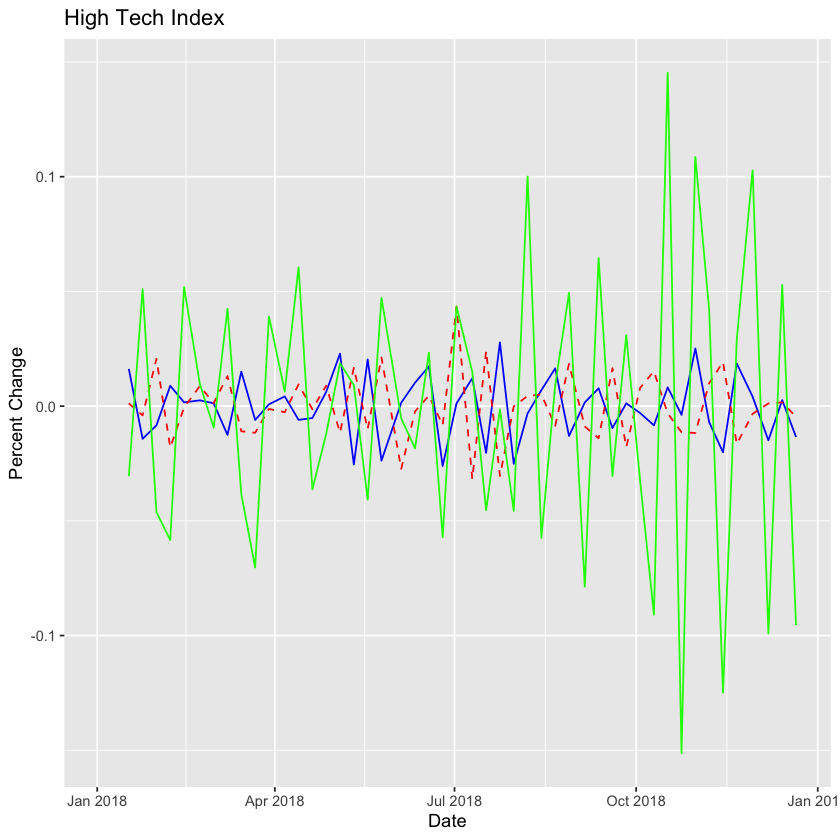

In [464]:
library(ggplot2)

ggplot(data = High_Tech, aes(x = Date)) +
  geom_line(aes(y = Buy_Low), color = "blue", linetype = "solid") +
  geom_line(aes(y = Buy_High), color = "red", linetype = "dashed") +
  geom_line(aes(y = Average_Index), color = "green", linetype = "solid") +
  labs(
    x = "Date",
    y = "Percent Change",
    title = "High Tech Index"
  )

# The tightness in both the buying low and buying high shows that they do a great job at 
# stabalizing the volatility from the rebalance days and the portfolio as a whole.

In [465]:
library(dplyr)

# Read JPY data
JPY = read.csv("JPY_data.csv")

# Keep only the Date and Close columns
JPY = JPY[,c("Date", "Close")]
JPY$Close_JPY = JPY$Close
JPY = JPY[,-2]

# Change date in the dataframe from character to date
JPY$Date = as.Date(JPY$Date, format = "%Y-%m-%d")

# Create a new data frame
JPY_rebalance_close = data.frame(Date = rebalance$Date,rebalance_close[1:12])

# Perform an inner join to add data from JPY to JPY_rebalance based on the dates needed
JPY_rebalance = JPY_rebalance_close %>%
  inner_join(JPY, by = c("Date" = "Date"))

# Convert buy low and buy high MTM from USD to JPY
JPY_rebalance$MTM_low_JPY = (JPY_rebalance$MTM_buy_low) * (JPY_rebalance$Close_JPY)
JPY_rebalance$MTM_high_JPY = (JPY_rebalance$MTM_buy_high) * (JPY_rebalance$Close_JPY)

In [466]:
# Create a new data frame that will only have the percent change for each MTM, high, low, USD, JPY.
MTM_USD_JPY = data.frame(Date = JPY_rebalance$Date)

# Create new column for each data needed.
MTM_low_USD = c(0, diff(JPY_rebalance$MTM_buy_low) / lag(JPY_rebalance$MTM_buy_low)*100)
MTM_low_USD = MTM_low_USD[-1]
MTM_USD_JPY$MTM_low_USD = MTM_low_USD

MTM_high_USD = c(0, diff(JPY_rebalance$MTM_buy_high) / lag(JPY_rebalance$MTM_buy_high)*100)
MTM_high_USD = MTM_high_USD[-1]
MTM_USD_JPY$MTM_high_USD = MTM_high_USD

MTM_low_JPY = c(0, diff(JPY_rebalance$MTM_low_JPY) / lag(JPY_rebalance$MTM_low_JPY))
MTM_low_JPY = MTM_low_JPY[-1]
MTM_USD_JPY$MTM_low_JPY = MTM_low_JPY

MTM_high_JPY = c(0, diff(JPY_rebalance$MTM_high_JPY) / lag(JPY_rebalance$MTM_high_JPY))
MTM_high_JPY = MTM_high_JPY[-1]
MTM_USD_JPY$MTM_high_JPY = MTM_high_JPY

Warning message in diff(JPY_rebalance$MTM_buy_low)/lag(JPY_rebalance$MTM_buy_low):
“longer object length is not a multiple of shorter object length”
Warning message in diff(JPY_rebalance$MTM_buy_high)/lag(JPY_rebalance$MTM_buy_high):
“longer object length is not a multiple of shorter object length”
Warning message in diff(JPY_rebalance$MTM_low_JPY)/lag(JPY_rebalance$MTM_low_JPY):
“longer object length is not a multiple of shorter object length”
Warning message in diff(JPY_rebalance$MTM_high_JPY)/lag(JPY_rebalance$MTM_high_JPY):
“longer object length is not a multiple of shorter object length”


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


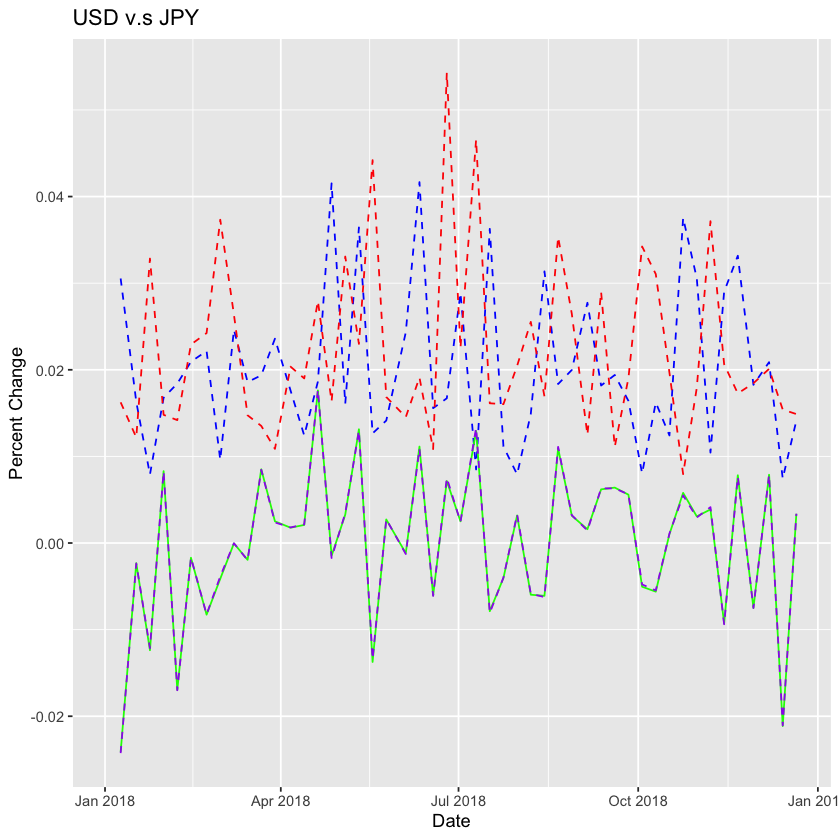

In [467]:
# Plot buy low and buy high for both USD and JPY
library(ggplot2)

ggplot(data = MTM_USD_JPY, aes(x = Date)) +
  geom_line(aes(y = MTM_low_USD), color = "blue", linetype = "dashed") +
  geom_line(aes(y = MTM_high_USD), color = "red", linetype = "dashed") +
  geom_line(aes(y = MTM_low_JPY), color = "green", linetype = "solid") +
  geom_line(aes(y = MTM_high_JPY), color = "purple", linetype = "dashed") +
  labs(
    x = "Date",
    y = "Percent Change",
    title = "USD v.s JPY"
  )

# This shows how currency conversion only changes the the currency as the rolling percentage changes are still tight and sideways.

In [468]:
# Attempt to change the days interval of rebalancing to maximize MTM
# I will be testing a more frequent rebalance of every 3 days
# I believe this will amplify the returns as it willll will be rebalancing and catching more momentum on the
# stocks that are top 5 in Adj.Close percentage gains on rebalance days.

rebalance_all = combined_data[seq(1, nrow(combined_data), by = 3), seq(1, ncol(combined_data), by = 2)]
rebalance_close_all = combined_data[seq(1, nrow(combined_data), by = 3), seq(2, ncol(combined_data), by = 2)]

# Create the stock list of all 10 stocks that will be bought on rebalance days
buy_all = stock_data_frame_all
buy_all = data.frame(lapply(buy_all, function(x) sub("_CHANGE_all", "", x)))
head(buy_all)

head(rebalance_close_all)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
2,TSLA,MSFT,FB,AAPL,AMZN,GOOG,SAP,ORCL,NFLX,IBM
3,SAP,MSFT,GOOG,FB,IBM,ORCL,NFLX,AAPL,AMZN,TSLA
4,FB,SAP,IBM,MSFT,TSLA,ORCL,GOOG,AAPL,AMZN,NFLX
5,IBM,AAPL,AMZN,NFLX,GOOG,FB,MSFT,ORCL,SAP,TSLA
6,TSLA,SAP,ORCL,IBM,MSFT,GOOG,FB,AAPL,AMZN,NFLX


,Close.IBM,Close.MSFT,Close.GOOG,Close.AAPL,Close.AMZN,Close.FB,Close.NFLX,Close.TSLA,Close.ORCL,Close.SAP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39
4,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,21.10533,48.47,116.33
7,156.9599,87.82,55.1305,43.5725,62.7165,187.84,212.52,22.32000,48.80,112.87
10,156.6444,88.35,56.0880,44.0475,65.2430,178.39,221.53,22.67067,49.59,110.68
13,155.2294,90.00,56.8755,44.6150,64.7290,181.29,220.46,23.33467,50.58,113.20
16,158.0975,91.82,58.2120,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37


In [469]:
# Calculate the percentage change for the "Value" column
IBM_all = c(NA, (rebalance_all[,2]) / lag(rebalance_all[,2]) * 100 - 100)
MSFT_all = c(NA, (rebalance_all[,3]) / lag(rebalance_all[,3]) * 100 - 100)
GOOG_all = c(NA, (rebalance_all[,4]) / lag(rebalance_all[,4]) * 100 -100)
AAPL_all = c(NA, (rebalance_all[,5]) / lag(rebalance_all[,5]) * 100 -100)
AMZN_all = c(NA, (rebalance_all[,6]) / lag(rebalance_all[,6]) * 100 - 100)
FB_all = c(NA, (rebalance_all[,7]) / lag(rebalance_all[,7]) * 100 - 100)
NFLX_all = c(NA, (rebalance_all[,8]) / lag(rebalance_all[,8]) * 100 - 100)
TSLA_all = c(NA, (rebalance_all[,9]) / lag(rebalance_all[,9]) * 100 - 100)
ORCL_all = c(NA, (rebalance_all[,10]) / lag(rebalance_all[,10]) * 100 - 100)
SAP_all = c(NA, (rebalance_all[,11]) / lag(rebalance_all[,11]) * 100 - 100)

IBM_CHANGE_all = data.frame(IBM_all)
MSFT_CHANGE_all = data.frame(MSFT_all)
GOOG_CHANGE_all = data.frame(GOOG_all)
AAPL_CHANGE_all = data.frame(AAPL_all)
AMZN_CHANGE_all = data.frame(AMZN_all)
FB_CHANGE_all = data.frame(FB_all)
NFLX_CHANGE_all = data.frame(NFLX_all)
TSLA_CHANGE_all = data.frame(TSLA_all)
ORCL_CHANGE_all = data.frame(ORCL_all)
SAP_CHANGE_all = data.frame(SAP_all)

IBM_CHANGE_all = IBM_CHANGE_all[-1,]
MSFT_CHANGE_all = MSFT_CHANGE_all[-1,]
GOOG_CHANGE_all = GOOG_CHANGE_all[-1,]
AAPL_CHANGE_all = AMZN_CHANGE_all[-1,]
AMZN_CHANGE_all = AMZN_CHANGE_all[-1,]
FB_CHANGE_all = FB_CHANGE_all[-1,]
NFLX_CHANGE_all = NFLX_CHANGE_all[-1,]
TSLA_CHANGE_all = TSLA_CHANGE_all[-1,]
ORCL_CHANGE_all = ORCL_CHANGE_all[-1,]
SAP_CHANGE_all = SAP_CHANGE_all[-1,]

# Create a dataframe of all percentage changes for each
rebalance_percent_change_full_all = cbind(IBM_CHANGE_all, MSFT_CHANGE_all, GOOG_CHANGE_all, 
                                      AAPL_CHANGE_all, AMZN_CHANGE_all, FB_CHANGE_all,
                                      NFLX_CHANGE_all, TSLA_CHANGE_all, ORCL_CHANGE_all, SAP_CHANGE_all)

rebalance_percent_change_full_all = data.frame(rebalance_percent_change_full_all)

rebalance_percent_change_all = cbind(Date = rebalance_all$Date, rebalance_percent_change_full_all[1:10])

In [470]:
# Create an empty data frame to store the results
results_df_all = data.frame(matrix(ncol = 2, nrow = nrow(rebalance_percent_change_all)))

# Set column names for the new data frame
colnames(results_df_all) = c("Date", "Sorted_Stock_Names")

# Define a custom function to sort and get column names
sort_and_get_names_all = function(row) {
  sorted_data_all = sort(row)
  sorted_names_all = colnames(rebalance_percent_change_all)[2:11][order(row)]
  return(paste(sorted_names_all, collapse = ","))
}

# Apply the custom function to each row in the "rebalance" data frame
results_df_all$Date = rebalance_all$Date
results_df_all$Sorted_Stock_Names = apply(rebalance_percent_change_all[, 2:11], 1, sort_and_get_names_all)

# Print the results data frame
head(results_df_all)

# Split the columns into separate stocks
split_stocks_all = strsplit(results_df_all[,2], ",")

print(head(split_stocks_all))

# Create a data frame from split_stocks
stock_data_frame_all = as.data.frame(do.call(rbind, split_stocks_all))

# Create the 'buy_low_all' data frame with the first 5 columns
buy_low_all = stock_data_frame_all[, 1:5]

# Create the 'buy_high_all' data frame with columns 6 through 10
buy_high_all = stock_data_frame_all[, 6:10]

# Remove "_CHANGE_all" from stock symbols in buy_low for all rows
buy_low_all = data.frame(lapply(buy_low_all, function(x) sub("_CHANGE_all", "", x)))
head(buy_low_all)
                            
# Remove "_CHANGE_all" from stock symbols in buy_low for all rows
buy_high_all = data.frame(lapply(buy_high_all, function(x) sub("_CHANGE_all", "", x)))
head(buy_high_all)

,Date,Sorted_Stock_Names
,<date>,<chr>
1,2018-01-02,"IBM_CHANGE_all,MSFT_CHANGE_all,GOOG_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,FB_CHANGE_all,NFLX_CHANGE_all,TSLA_CHANGE_all,ORCL_CHANGE_all,SAP_CHANGE_all"
2,2018-01-05,"TSLA_CHANGE_all,MSFT_CHANGE_all,FB_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,GOOG_CHANGE_all,SAP_CHANGE_all,ORCL_CHANGE_all,NFLX_CHANGE_all,IBM_CHANGE_all"
3,2018-01-10,"SAP_CHANGE_all,MSFT_CHANGE_all,GOOG_CHANGE_all,FB_CHANGE_all,IBM_CHANGE_all,ORCL_CHANGE_all,NFLX_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,TSLA_CHANGE_all"
4,2018-01-16,"FB_CHANGE_all,SAP_CHANGE_all,IBM_CHANGE_all,MSFT_CHANGE_all,TSLA_CHANGE_all,ORCL_CHANGE_all,GOOG_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,NFLX_CHANGE_all"
5,2018-01-19,"IBM_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,NFLX_CHANGE_all,GOOG_CHANGE_all,FB_CHANGE_all,MSFT_CHANGE_all,ORCL_CHANGE_all,SAP_CHANGE_all,TSLA_CHANGE_all"
6,2018-01-24,"TSLA_CHANGE_all,SAP_CHANGE_all,ORCL_CHANGE_all,IBM_CHANGE_all,MSFT_CHANGE_all,GOOG_CHANGE_all,FB_CHANGE_all,AAPL_CHANGE_all,AMZN_CHANGE_all,NFLX_CHANGE_all"


[[1]]
 [1] "IBM_CHANGE_all"  "MSFT_CHANGE_all" "GOOG_CHANGE_all" "AAPL_CHANGE_all"
 [5] "AMZN_CHANGE_all" "FB_CHANGE_all"   "NFLX_CHANGE_all" "TSLA_CHANGE_all"
 [9] "ORCL_CHANGE_all" "SAP_CHANGE_all" 

[[2]]
 [1] "TSLA_CHANGE_all" "MSFT_CHANGE_all" "FB_CHANGE_all"   "AAPL_CHANGE_all"
 [5] "AMZN_CHANGE_all" "GOOG_CHANGE_all" "SAP_CHANGE_all"  "ORCL_CHANGE_all"
 [9] "NFLX_CHANGE_all" "IBM_CHANGE_all" 

[[3]]
 [1] "SAP_CHANGE_all"  "MSFT_CHANGE_all" "GOOG_CHANGE_all" "FB_CHANGE_all"  
 [5] "IBM_CHANGE_all"  "ORCL_CHANGE_all" "NFLX_CHANGE_all" "AAPL_CHANGE_all"
 [9] "AMZN_CHANGE_all" "TSLA_CHANGE_all"

[[4]]
 [1] "FB_CHANGE_all"   "SAP_CHANGE_all"  "IBM_CHANGE_all"  "MSFT_CHANGE_all"
 [5] "TSLA_CHANGE_all" "ORCL_CHANGE_all" "GOOG_CHANGE_all" "AAPL_CHANGE_all"
 [9] "AMZN_CHANGE_all" "NFLX_CHANGE_all"

[[5]]
 [1] "IBM_CHANGE_all"  "AAPL_CHANGE_all" "AMZN_CHANGE_all" "NFLX_CHANGE_all"
 [5] "GOOG_CHANGE_all" "FB_CHANGE_all"   "MSFT_CHANGE_all" "ORCL_CHANGE_all"
 [9] "SAP_CHANGE_all"  "TSLA_CHA

,Date,Close.IBM,Adj.Close.IBM,Close.MSFT,Adj.Close.MSFT,Close.GOOG,Adj.Close.GOOG,Close.AAPL,Adj.Close.AAPL,Close.AMZN,⋯,Close.FB,Adj.Close.FB,Close.NFLX,Adj.Close.NFLX,Close.TSLA,Adj.Close.TSLA,Close.ORCL,Adj.Close.ORCL,Close.SAP,Adj.Close.SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39185,53.2500,53.2500,43.0650,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,21.36867,21.36867,46.63,42.28245,112.39,101.2103
2,2018-01-03,151.5201,114.8733,86.35,80.76598,54.1240,54.1240,43.0575,40.76943,60.2100,⋯,184.67,184.67,205.05,205.05,21.15000,21.15000,47.71,43.26174,113.31,102.0388
3,2018-01-04,154.5889,117.1999,87.11,81.47682,54.3200,54.3200,43.2575,40.95880,60.4795,⋯,184.33,184.33,205.63,205.63,20.97467,20.97467,48.18,43.68793,115.05,103.6057
4,2018-01-05,155.3442,117.7725,88.19,82.48702,55.1115,55.1115,43.7500,41.42513,61.4570,⋯,186.85,186.85,209.99,209.99,21.10533,21.10533,48.47,43.95089,116.33,104.7584
5,2018-01-08,156.2811,118.4828,88.28,82.57117,55.3470,55.3470,43.5875,41.27126,62.3435,⋯,188.28,188.28,212.05,212.05,22.42733,22.42733,48.98,44.41334,114.80,103.3806
6,2018-01-09,156.6252,118.7437,88.22,82.51505,55.3130,55.3130,43.5825,41.26653,62.6350,⋯,187.87,187.87,209.31,209.31,22.24600,22.24600,49.06,44.65912,114.16,102.8042


,Date,Adj.Close.IBM,Adj.Close.MSFT,Adj.Close.GOOG,Adj.Close.AAPL,Adj.Close.AMZN,Adj.Close.FB,Adj.Close.NFLX,Adj.Close.TSLA,Adj.Close.ORCL,Adj.Close.SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,111.8001,80.39185,53.250,40.77653,59.4505,181.42,201.07,21.36867,42.28245,101.21030
6,2018-01-09,118.7437,82.51505,55.313,41.26653,62.6350,187.87,209.31,22.24600,44.65912,102.80422
11,2018-01-17,122.2372,84.31089,56.599,42.39566,64.7500,177.60,217.50,23.14400,45.76059,100.12966
16,2018-01-24,119.8599,85.88224,58.212,41.24049,67.8755,186.55,261.30,23.05933,46.83473,102.99333
21,2018-01-31,118.6495,88.86596,58.497,39.63319,72.5445,186.89,270.30,23.62067,46.96217,101.98474
26,2018-02-07,111.5102,83.81517,52.429,37.76551,70.8390,180.18,264.56,23.00000,44.48616,94.63643


,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
1,IBM,MSFT,GOOG,AAPL,AMZN
2,TSLA,MSFT,FB,AAPL,AMZN
3,SAP,MSFT,GOOG,FB,IBM
4,FB,SAP,IBM,MSFT,TSLA
5,IBM,AAPL,AMZN,NFLX,GOOG
6,TSLA,SAP,ORCL,IBM,MSFT


,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>
1,FB,NFLX,TSLA,ORCL,SAP
2,GOOG,SAP,ORCL,NFLX,IBM
3,ORCL,NFLX,AAPL,AMZN,TSLA
4,ORCL,GOOG,AAPL,AMZN,NFLX
5,FB,MSFT,ORCL,SAP,TSLA
6,GOOG,FB,AAPL,AMZN,NFLX


In [471]:
# Initialize the initial_portfolio_funds
initial_portfolio_funds_high_all = 5000000

# Create vectors to store shares to buy, total spent, and portfolio funds for each row
shares_to_buy_list_high_all = list()
total_spent_list_high_all = list()
portfolio_funds_list_high_all = list()

# Iterate through each row of buy_high
for (row in 1:nrow(buy_high_all)) {
  initial_stock_buy_high_all = buy_high_all[row,]
  investment_amount_high_all = sum(unlist(total_spent_list_high_all[row-1]) + unlist(portfolio_funds_list_high_all[row-1]))
  shares_to_buy_high_all = numeric(length(initial_stock_buy_high_all))
  total_spent_high_all = numeric(length(initial_stock_buy_high_all))
  
  if (row == 1) {
    # First row, use the initial_portfolio_funds
    stock_investment_amount_high_all = initial_portfolio_funds_high_all / ncol(buy_high_all)
  } else {
    # Use previous row's portfolio values
    stock_investment_amount_high_all = investment_amount_high_all / ncol(buy_high_all)
  }
  
  for (i in 1:length(initial_stock_buy_high_all)){
    stock_symbol = initial_stock_buy_high_all[i]
    close_price = rebalance_close_all[row, paste("Close", stock_symbol, sep = ".")]
    shares_to_buy_high_all[i] = floor(stock_investment_amount_high_all / close_price[1])
    total_spent_high_all[i] = shares_to_buy_high_all[i] * close_price[1]
    
    print(paste("Row:", row, "Stock Symbol: ", stock_symbol))
    print(paste("Close Price: ", close_price[1]))
    print(paste("Shares to Buy: ", shares_to_buy_high_all[i]))
    print(total_spent_high_all[i])
  }
  
  shares_to_buy_list_high_all[[row]] = shares_to_buy_high_all
  total_spent_list_high_all[[row]] = total_spent_high_all
    if (row ==1){
        portfolio_funds_list_high_all[[row]] = initial_portfolio_funds_high_all - sum(total_spent_high_all)
    } else {
        portfolio_funds_list_high_all[[row]] = investment_amount_high_all - sum(total_spent_high_all)
    }
}

# Print the results for each row
for (row in 1:nrow(buy_high_all)) {
  cat("Row:", row, "Cash Balance in Portfolio:", portfolio_funds_list_high_all[[row]], "\n")
}


[1] "Row: 1 Stock Symbol:  FB"
[1] "Close Price:  181.419998"
[1] "Shares to Buy:  5512"
[1] 999987
[1] "Row: 1 Stock Symbol:  NFLX"
[1] "Close Price:  201.070007"
[1] "Shares to Buy:  4973"
[1] 999921.1
[1] "Row: 1 Stock Symbol:  TSLA"
[1] "Close Price:  21.368668"
[1] "Shares to Buy:  46797"
[1] 999989.6
[1] "Row: 1 Stock Symbol:  ORCL"
[1] "Close Price:  46.630001"
[1] "Shares to Buy:  21445"
[1] 999980.4
[1] "Row: 1 Stock Symbol:  SAP"
[1] "Close Price:  112.389999"
[1] "Shares to Buy:  8897"
[1] 999933.8
[1] "Row: 2 Stock Symbol:  GOOG"
[1] "Close Price:  55.1115"
[1] "Shares to Buy:  18147"
[1] 1000108
[1] "Row: 2 Stock Symbol:  SAP"
[1] "Close Price:  116.330002"
[1] "Shares to Buy:  8597"
[1] 1000089
[1] "Row: 2 Stock Symbol:  ORCL"
[1] "Close Price:  48.470001"
[1] "Shares to Buy:  20634"
[1] 1000130
[1] "Row: 2 Stock Symbol:  NFLX"
[1] "Close Price:  209.990005"
[1] "Shares to Buy:  4762"
[1] 999972.4
[1] "Row: 2 Stock Symbol:  IBM"
[1] "Close Price:  155.344162"
[1] "Shares 

In [479]:
# Create summed list for buy low and buy high
#summed_list_buy_low_all = lapply(total_spent_list_low_all, function(row) sum(row))
summed_list_buy_high_all = lapply(total_spent_list_high_all, function(row) sum(row))
                              
# Sum the corresponding values from both lists and store the results in a new list
#summed_list_MTM_buy_low_all = mapply(function(value1, value2) value1 + value2, summed_list_buy_low_all, portfolio_funds_list_low_all)
summed_list_MTM_buy_high_all = mapply(function(value1, value2) value1 + value2, summed_list_buy_high_all, portfolio_funds_list_high_all)

                                  
# Convert "result_list" to a dataframe
#result_df_buy_low_all = data.frame(MTM_buy_low_all = summed_list_MTM_buy_low_all)
result_df_buy_high_all = data.frame(MTM_buy_high_all = summed_list_MTM_buy_high_all)

# Add the new column to the "rebalance_close" dataframe
#rebalance_close$MTM_buy_low_all = result_df_buy_low_all$MTM_buy_low_all
rebalance_close_all$MTM_buy_high_all = result_df_buy_high_all$MTM_buy_high_all

head(rebalance_close_all)

,Close.IBM,Close.MSFT,Close.GOOG,Close.AAPL,Close.AMZN,Close.FB,Close.NFLX,Close.TSLA,Close.ORCL,Close.SAP,MTM_buy_high_all
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39,5000000
4,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,21.10533,48.47,116.33,5000752
7,156.9599,87.82,55.1305,43.5725,62.7165,187.84,212.52,22.32000,48.80,112.87,5002139
10,156.6444,88.35,56.0880,44.0475,65.2430,178.39,221.53,22.67067,49.59,110.68,5002801
13,155.2294,90.00,56.8755,44.6150,64.7290,181.29,220.46,23.33467,50.58,113.20,5003797
16,158.0975,91.82,58.2120,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37,5004592


In [480]:
# Create a new data frame
rebalance_high_three = data.frame(
  Date = rebalance_all$Date,
  MTM_buy_high_all = rebalance_close_all$MTM_buy_high_all
)

# Create a new data frame
rebalance_high = data.frame(
  Date = rebalance$Date,
  MTM_buy_high = rebalance_close$MTM_buy_high
)


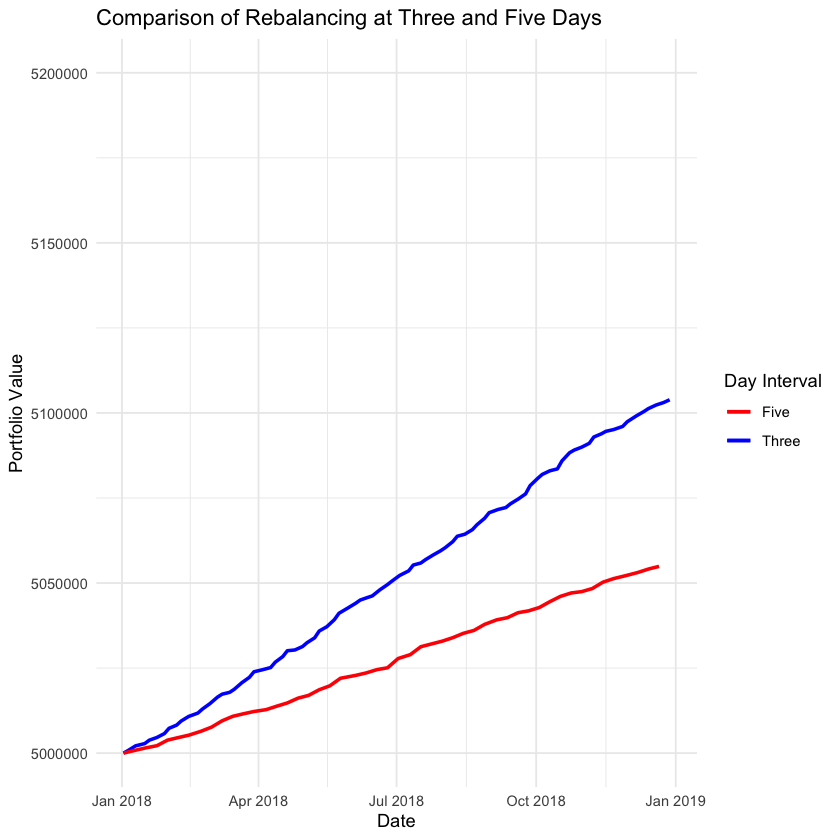

In [481]:
# Load the ggplot2 library if not already loaded
library(ggplot2)

# Create a plot using the two data frames
ggplot() +
  geom_line(data = rebalance_high_three, aes(x = Date, y = MTM_buy_high_all, color = "Three"), size = 1) +
  geom_line(data = rebalance_high, aes(x = Date, y = MTM_buy_high, color = "Five"), size = 1) +
  labs(title = "Comparison of Rebalancing at Three and Five Days", x = "Date", y = "Portfolio Value", color = "Day Interval") +
  scale_color_manual(values = c("Three" = "blue", "Five" = "red")) +
  scale_y_continuous(limits = c(5000000, 5200000)) +  # Adjust the Y-axis limits
  theme_minimal()